In [1]:
import numpy as np
import matplotlib.pyplot as plt
from libs.utils import EXPERIMENT
EX = EXPERIMENT('cg',1,'close',20)
EX.get_DTpv()
EX.correct_positions()

Material: cg Aperture: close Power: 20
	I0 = 15.915494309189535
Peak: 1.0395327592517003
Valley: 0.9555947722554221
Position of the focal plane: 123.30402010050251
Rayleigh range: 12.488915164055575


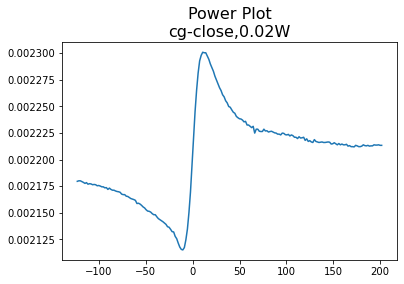

In [2]:
EX.plot_power()

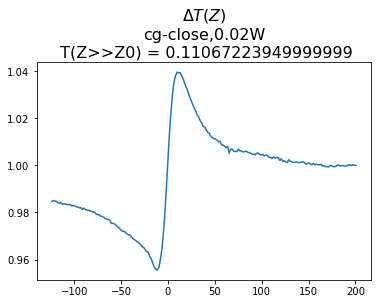

In [3]:
EX.plot_normalized_trasmittance()